In [334]:
import requests
import pandas as pd
import json
from pandas.io.json import json_normalize
from bs4 import BeautifulSoup
import scipy
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

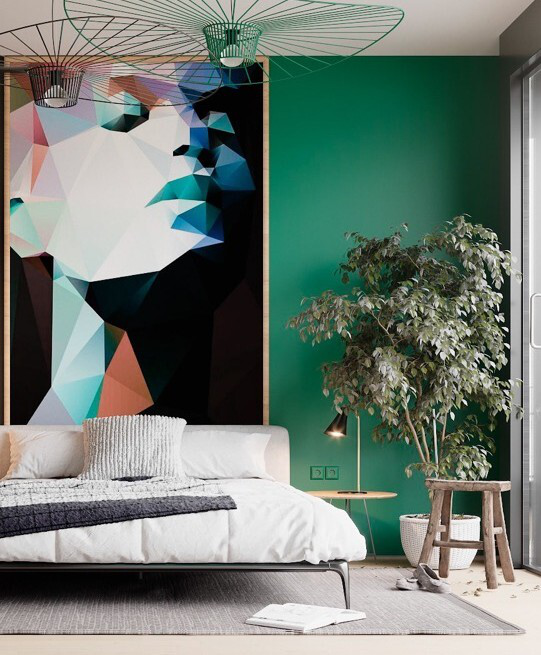

In [335]:
image = Image.open('bed2_1.jpg')
image = image.convert("RGB")
image

In [336]:
pix = list(image.getdata())

In [337]:
pix[:10]

[(187, 174, 165),
 (186, 173, 164),
 (185, 172, 163),
 (185, 172, 163),
 (185, 172, 163),
 (186, 173, 164),
 (187, 174, 165),
 (187, 174, 165),
 (187, 174, 165),
 (187, 174, 165)]

In [338]:
def convertRGBtoXYZ(R, G, B):
    var_R = ( R / 255 )        # R from 0 to 255
    var_G = ( G / 255 )        # G from 0 to 255
    var_B = ( B / 255 )        # B from 0 to 255

    if var_R > 0.04045:
        var_R = ( ( var_R + 0.055 ) / 1.055 ) ^ 2.4
    else:
        var_R = var_R / 12.92
    if var_G > 0.04045:
        var_G = ( ( var_G + 0.055 ) / 1.055 ) ^ 2.4
    else:
        var_G = var_G / 12.92
    if var_B > 0.04045:
        var_B = ( ( var_B + 0.055 ) / 1.055 ) ^ 2.4
    else:
        var_B = var_B / 12.92

    var_R = var_R * 100
    var_G = var_G * 100
    var_B = var_B * 100

    # Observer. = 2°, Illuminant = D65
    X = var_R * 0.4124 + var_G * 0.3576 + var_B * 0.1805
    Y = var_R * 0.2126 + var_G * 0.7152 + var_B * 0.0722
    Z = var_R * 0.0193 + var_G * 0.1192 + var_B * 0.9505
    

## Implementing LUV formula! 

In [339]:
df = pd.read_html('/home/arana/Documents/Python/RGB Color Codes Chart 🎨.html')
df[3]['Decimal Code(R,G,B)'] = df[3]['Decimal Code(R,G,B)'].apply(lambda x : x[1:-1].split(','))
df[4]['Decimal CodeR,G,B'] = df[4]['Decimal CodeR,G,B'].apply(lambda x : x[1:-1].split(','))

In [340]:
# df[3].head(20)

In [341]:
colorDict = {}

for index, rows in df[3].iterrows():
    colorDict[rows['Hex Code#RRGGBB']] = rows['Decimal Code(R,G,B)']

# for index, rows in df[4].iterrows():
#     colorDict[rows['Hex Code#RRGGBB']] = rows['Decimal CodeR,G,B']

colorDict
    

{'#000000': ['0', '0', '0'],
 '#FFFFFF': ['255', '255', '255'],
 '#FF0000': ['255', '0', '0'],
 '#00FF00': ['0', '255', '0'],
 '#0000FF': ['0', '0', '255'],
 '#FFFF00': ['255', '255', '0'],
 '#00FFFF': ['0', '255', '255'],
 '#FF00FF': ['255', '0', '255'],
 '#C0C0C0': ['192', '192', '192'],
 '#808080': ['128', '128', '128'],
 '#800000': ['128', '0', '0'],
 '#808000': ['128', '128', '0'],
 '#008000': ['0', '128', '0'],
 '#800080': ['128', '0', '128'],
 '#008080': ['0', '128', '128'],
 '#000080': ['0', '0', '128']}

In [342]:
df[3].head()

,Color,HTML / CSS Name,Hex Code#RRGGBB,"Decimal Code(R,G,B)"
0,NaN,Black,#000000,"[0, 0, 0]"
1,NaN,White,#FFFFFF,"[255, 255, 255]"
2,NaN,Red,#FF0000,"[255, 0, 0]"
3,NaN,Lime,#00FF00,"[0, 255, 0]"
4,NaN,Blue,#0000FF,"[0, 0, 255]"


In [343]:
from colormath.color_objects import LuvColor, XYZColor, sRGBColor
from colormath.color_conversions import convert_color

rgb = sRGBColor(255, 255, 255)
xyz = convert_color(rgb, XYZColor)

luv = convert_color(xyz, LuvColor)


In [344]:
import math
def calculateDistance(a, b):
    return math.sqrt((a[0] - int(b[0])) ** 2 + (a[1] - int(b[1])) ** 2  + (a[2] - int(b[2])) ** 2 )

In [345]:
colorDict

{'#000000': ['0', '0', '0'],
 '#FFFFFF': ['255', '255', '255'],
 '#FF0000': ['255', '0', '0'],
 '#00FF00': ['0', '255', '0'],
 '#0000FF': ['0', '0', '255'],
 '#FFFF00': ['255', '255', '0'],
 '#00FFFF': ['0', '255', '255'],
 '#FF00FF': ['255', '0', '255'],
 '#C0C0C0': ['192', '192', '192'],
 '#808080': ['128', '128', '128'],
 '#800000': ['128', '0', '0'],
 '#808000': ['128', '128', '0'],
 '#008000': ['0', '128', '0'],
 '#800080': ['128', '0', '128'],
 '#008080': ['0', '128', '128'],
 '#000080': ['0', '0', '128']}

In [346]:
%%time
colorMap = {}

for pixel in pix:
    closestColor = ''
    previousMin = 10000000
    for color in colorDict:
        currentDistance = calculateDistance(pixel, colorDict[color])
        if currentDistance < previousMin: 
            closestColor = color
            previousMin = currentDistance
    if colorMap.get(closestColor):
        colorMap[closestColor] += 1
    else:
        colorMap[closestColor] = 1
        

CPU times: user 9.48 s, sys: 0 ns, total: 9.48 s
Wall time: 9.49 s


In [347]:
result = sorted(colorMap.items(), key=lambda item: item[1], reverse=True)

In [348]:
colors = []
values = []
colorName = []

for data in result:
    colors.append(data[0])
    values.append(data[1])

for code in colors:
    try:
        colorName.append(df[3][df[3]['Hex Code#RRGGBB'] == code]['HTML / CSS Name'].values[0])
    except:
        print(code)
colorName

['Silver',
 'Black',
 'Gray',
 'Teal',
 'White',
 'Green',
 'Olive',
 'Maroon',
 'Navy',
 'Purple',
 'Cyan / Aqua']

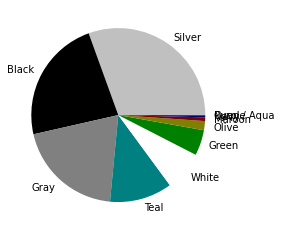

In [349]:
plt.pie(values, colors=colors, labels=colorName)
plt.show()

<Figure size 1440x1440 with 0 Axes>

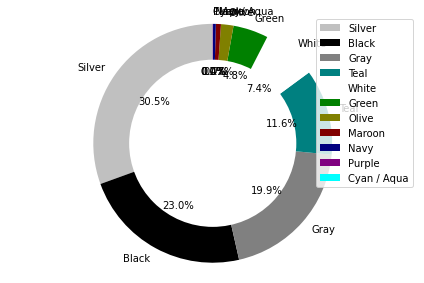

In [350]:
 
plt.figure(figsize=(20,20))
fig1, ax1 = plt.subplots()
ax1.pie(values, colors = colors, autopct='%1.1f%%', startangle=90, labels=colorName)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

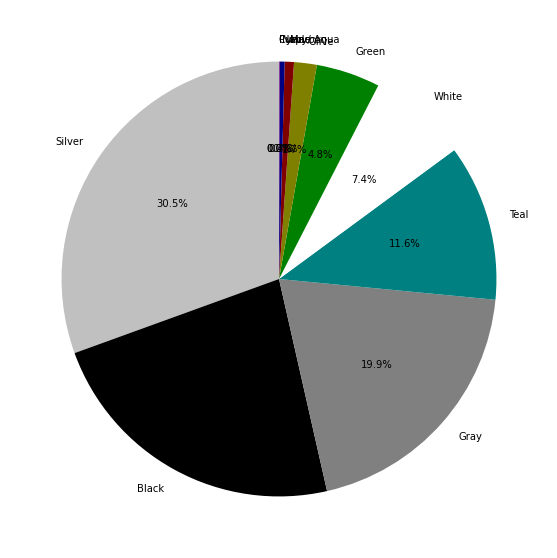

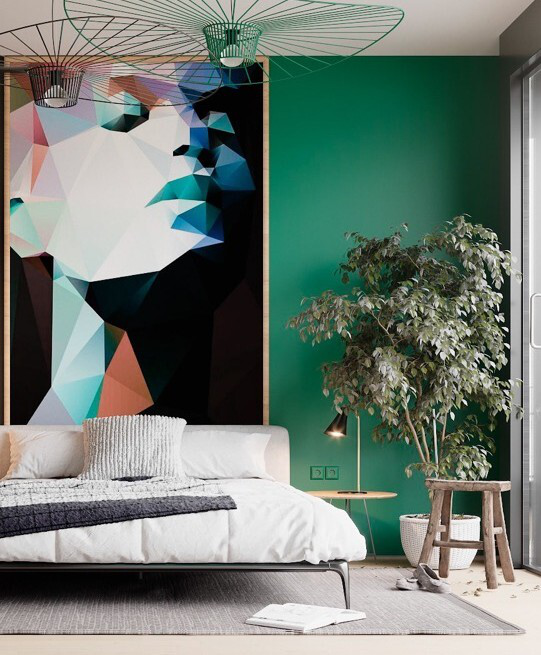

In [351]:
plt.figure(figsize=(10, 10))
plt.pie(values, labels = colorName, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()
image